In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- Physical Constants in SI units ---
G = 6.67430e-11         # m^3 kg^-1 s^-2
c = 2.99792458e8        # m/s
M_sun = 1.989e30      # kg
AU = 1.496e11           # m

# Schwarzschild radius
r_s = 2 * G * M_sun / c**2
r_s2_inv = 1 / r_s**2

In [3]:
# Semiclassical perturbation
t_tilde = 0
t_tilde1 = 0.1
t_tilde2 = 0.01
t_tilde3 = 1e-3
t_tilde4 = 1e-4
t_tilde5 = 1e-5
t_tilde6 = 1e-6
t_tilde7 = 1e-7
t_tilde8 = 1e-8
t_tilde9 = 1e-9
t_tilde10 = 1e-10
t_tilde11 = 1e-11
t_tilde12 = 1e-12

In [4]:
# Critical distances
P_c = 1.5 * r_s
b_c = (3 * np.sqrt(3) / 2) * r_s
zeta_sq = (r_s / b_c)**2

In [5]:
def coth(z):
    return 1.0 / np.tanh(z)

def htt(x):
    inv_x2 = 1.0 / (x * x)
    return -2 * x**3 * (x**2 - coth(inv_x2))

def hrr(x):
    inv_x2 = 1.0 / (x * x)
    denom = (1 - x)**2
    return -2 * x**2 / denom * (x**2 - coth(inv_x2))

def hphiphi(x):
    return -2 * r_s**2 / x * (x - coth(1.0 / x))

def g0(x):
    return x**3 - x**2 + zeta_sq

def dg0(x):
    return 3 * x**2 - 2 * x

def h(x):
    g = g0(x)
    h_rr = hrr(x)
    h_pp = hphiphi(x)
    h_tt = htt(x)

    term1 = g * ((1 - x) * h_rr - x**2 * r_s2_inv * h_pp)
    term2 = -zeta_sq * (x**2 * r_s2_inv * h_pp - h_tt / (1 - x))
    return term1 + term2

def dh(x):
    dx = 1e-10
    return (h(x + dx) - h(x - dx)) / (2 * dx)

In [6]:
def deriv(y,t):
    x, v = y
    return np.array([v, 0.5 * (dg0(x) + t * dh(x))])

def rk4_step(y, h,t):
    k1 = h * deriv(y,t)
    k2 = h * deriv(y + 0.5 * k1,t)
    k3 = h * deriv(y + 0.5 * k2,t)
    k4 = h * deriv(y + k3,t)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6.0

def integrate_rk4(y_ini, phis, h_phi,t):
    N = len(phis)
    ys = np.empty((N, 2))
    y = y_ini.copy()
    for i in range(N):
        ys[i] = y
        y = rk4_step(y, h_phi,t)
    return ys

In [7]:
# Initial conditions
x0 = r_s / P_c
v0 = 0.0
y_ini = np.array([x0, v0])

# Integration setup
n_revolutions = 50
# h_phi = 1e-7
h_phi = 10**-3
phis = np.arange(0, 2 * np.pi * n_revolutions, h_phi)

In [8]:
#trial code to find the numer of revolutions before the deviation becomes significant
def find_separation_point(y_ini, h_phi, t1, t2):
    ys1 = []
    ys2 = []
    y1 = y_ini.copy()
    y2 = y_ini.copy()
    while abs(y1[0]-y2[0]) < 0.01:
        ys1.append(y1)
        ys2.append(y2)
        y1 = rk4_step(y1, h_phi,t1)
        y2 = rk4_step(y2, h_phi,t2)
    index = len(ys2)
    total_angle_change = phis[index]
    number_of_revolutions = total_angle_change/(2*np.pi)
    return number_of_revolutions

In [9]:
#Calculations
N1 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde1) 
N2 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde2)
N3 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde3) 
N4 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde4) 
N5 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde5) 
N6 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde6) 
N7 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde7) 
N8 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde8) 
N9 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde9) 
N10 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde10) 
N11 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde11) 
N12 = find_separation_point(y_ini, h_phi, t_tilde, t_tilde12) 

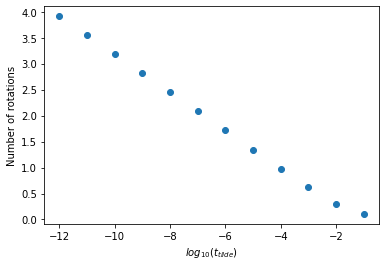

In [11]:
#plotting the results
log_t_tilde = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12]
N_turns = [N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12]

plt.figure()
plt.scatter(log_t_tilde, N_turns)
plt.xlabel('$log_{10}(t_{tilde})$')
plt.ylabel('Number of rotations')
plt.show()

In [12]:
import scipy.optimize
import scipy.stats

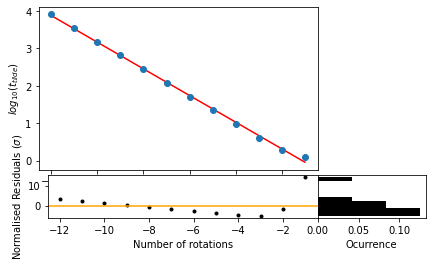

chi^2_min = 313.90410759991113
reduced chi^2 = 31.390410759991113
P(chi^2_min, DoF) = 1.7806735107317663e-61
optimised parameter[0] = (-0.35599566208667766 +/- 0.0008362420142481012) units
optimised parameter[1] = (-0.3936480492861935 +/- 0.006154574476847004) units


In [13]:
#for now, I'm going to assume a constant error of 0.01, just to run the code with. 
#If anyone would like to suggest an improvement let me know. I will keep working on it
y_errors1 = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]

def model_function1(x, *params):
    return params[0]*x + params[1]

initial_values = np.array([-0.3, 0])

def chi_squared(model_params, model, x_data, y_data, y_err):
    return np.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!

x_values1 = np.array(log_t_tilde)
y_values1 = np.array(N_turns)

degrees_of_freedom = x_values1.size - initial_values.size

fit = scipy.optimize.minimize(chi_squared, # the function to minimize
                              initial_values, # where in 'parameter space' to start from
                              args=(model_function1, x_values1, y_values1, y_errors1))

popt1, cov1 = scipy.optimize.curve_fit(model_function1, # function to fit
                                     x_values1, # x data
                                     y_values1, # y data
                                     sigma=y_errors1, # array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial_values, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

popt1_errs = np.sqrt(np.diag(cov1))

normalisedresiduals1 = (y_values1 - model_function1(x_values1, *popt1))/y_errors1
normalisedxresiduals1 = (x_values1 + (y_values1 -0.00000074)/0.00000000404)/y_errors1

plt.figure(figsize=(5,3))
plt.errorbar(x_values1, 
             y_values1, 
             yerr=y_errors1, 
             marker='o', 
             linestyle='None')

plt.ylabel('$log_{10}(t_{tilde})$')

# Generate best fit using model function and best fit parameters, and add to plot
plt.plot(x_values1, 
         model_function1(x_values1, *popt1), 
         color='r')

plt.figure(1).add_axes((0.15, -0.1, 0.75, 0.2))

plt.scatter(x_values1, normalisedresiduals1, marker = ".", color = 'black')

plt.axhline(y=0, color = 'orange')

plt.xlabel("Number of rotations")
plt.ylabel("Normalised Residuals ($\sigma$)")

plt.figure(1).add_axes((0.9, -0.1, 0.3, 0.2))

plt.hist(normalisedresiduals1, density = True, color = 'black', orientation = "horizontal")

plt.gca().axes.get_yaxis().set_ticks([])

plt.xlabel("Ocurrence")

plt.show()

chi_squared_min = chi_squared(popt1, model_function1, x_values1, y_values1, y_errors1)
print('chi^2_min = {}'.format(chi_squared_min))
print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))
for i, (val, err) in enumerate(zip(popt1, popt1_errs)):
    print('optimised parameter[{}] = ({} +/- {}) units'.format(i, val, err))